In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [66]:
# csv file downloaded on system and added in root folder on Jupyter
#Read data from csv in dataframe
data = pd.read_csv("data.csv",sep = ',', skipinitialspace = True)
print(data)

    Patient ID  Blood Pressure Before (mmHg)  Blood Pressure After (mmHg)
0            1                           130                          120
1            2                           142                          135
2            3                           120                          118
3            4                           135                          127
4            5                           148                          140
..         ...                           ...                          ...
95          96                           136                          129
96          97                           143                          137
97          98                           127                          123
98          99                           139                          135
99         100                           135                          130

[100 rows x 3 columns]


In [69]:
#a. Calculate dispersion measures

In [70]:
range_before = data['Blood Pressure Before (mmHg)'].max() - data['Blood Pressure Before (mmHg)'].min()
range_after = data['Blood Pressure After (mmHg)'].max() - data['Blood Pressure After (mmHg)'].min()

In [71]:
variance_before = np.var(data['Blood Pressure Before (mmHg)'])
variance_after = np.var(data['Blood Pressure After (mmHg)'])

In [74]:
std_dev_before = np.std(data['Blood Pressure Before (mmHg)'])
std_dev_after = np.std(data['Blood Pressure After (mmHg)'])

In [75]:
print("Dispersion in Blood Pressure Before:")
print("Range:", range_before)
print("Variance:", variance_before)
print("Standard Deviation:", std_dev_before)
print("Dispersion in Blood Pressure After:")
print("Range:", range_after)
print("Variance:", variance_after)
print("Standard Deviation:", std_dev_after)

Dispersion in Blood Pressure Before:
Range: 28
Variance: 43.10189999999998
Standard Deviation: 6.5652037287505385
Dispersion in Blood Pressure After:
Range: 23
Variance: 46.97040000000002
Standard Deviation: 6.853495458523338


In [ ]:
#Interpretation
#There is similar amount of spread and variance for both cases (before & after)

In [76]:
#b.1 Calculate mean and 5% confidence interval

In [77]:
mean_before = np.mean(data['Blood Pressure Before (mmHg)'])
mean_After = np.mean(data['Blood Pressure After (mmHg)'])

In [78]:
confidence_interval_before = stats.norm.interval(0.95, loc = mean_before,scale=dispersion_before/np.sqrt(len(data)))
confidence_interval_after = stats.norm.interval(0.95, loc=mean_after, scale=dispersion_after/np.sqrt(len(data)))

In [83]:
print("Mean Blood Pressure Before: ", mean_before)
print("Mean Blood Pressure After: ", mean_after)
print("Confidence Interval Before: ", confidence_interval_before)
print("Confidence Interval After: ", confidence_interval_after)

Mean Blood Pressure Before:  133.91
Mean Blood Pressure After:  128.36
Confidence Interval Before:  (128.42210084328784, 139.39789915671216)
Confidence Interval After:  (123.8520828355579, 132.86791716444213)


In [62]:
#b.2 ploting the mean and confidence intervals

<function matplotlib.pyplot.show(close=None, block=None)>

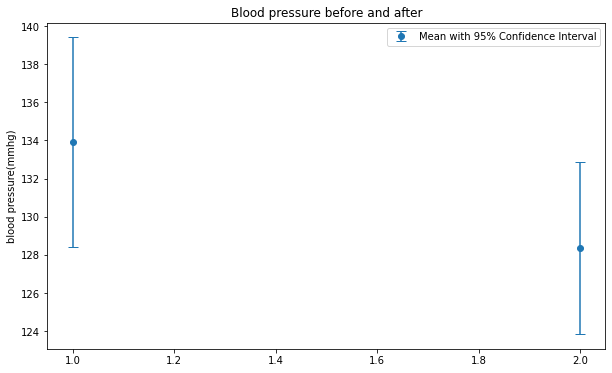

In [63]:
plt.figure(figsize = (10,6))
plt.errorbar(x=[1, 2], y=[mean_before, mean_after],
             yerr=[mean_before-confidence_interval_before[0], mean_after-confidence_interval_after[0]],
             fmt='o', capsize=5, label='Mean with 95% Confidence Interval')
plt.ylabel('blood pressure(mmhg)')
plt.legend()
plt.title('Blood pressure before and after')
plt.show

In [ ]:
#c. Calculate the Mean absolute deviation and Standard deviation and interpret

In [84]:
Mean_absolute_deviation_before = np.mean(np.abs(data['Blood Pressure Before (mmHg)'] - mean_before))
Mean_absolute_deviation_after = np.mean(np.abs(data['Blood Pressure After (mmHg)'] - mean_after))

In [85]:
Standard_deviation_before =np.std(data['Blood Pressure Before (mmHg)'],ddof = 1)
Standard_deviation_after =np.std(data['Blood Pressure After (mmHg)'],ddof = 1)

In [86]:
print("Mean absolute deviation before:", Mean_absolute_deviation_before)
print("Mean absolute deviation after:", Mean_absolute_deviation_after)
print("Standard deviation before:", Standard_deviation_before)
print("Standard deviation after:", Standard_deviation_after)

Mean absolute deviation before: 5.7118
Mean absolute deviation after: 5.9
Standard deviation before: 6.598278012275075
Standard deviation after: 6.8880221025232276


In [ ]:
#Interpretation
#There is less dispersion and spread arround the mean value and similar amount for both cases(before & after)

In [ ]:
#d. Calculate the correlation coefficient and check the significance of it at 1% level of significance

In [49]:
correlation_coefficient, p_value = stats.pearsonr(data['Blood Pressure Before (mmHg)'],data['Blood Pressure After (mmHg)']) 
print("correlation_coefficient:", correlation_coefficient)
print("p_value:", p_value)

correlation_coefficient: 0.9779485966556021
p_value: 1.8097381433059708e-68


In [55]:
if p_value < 0.01 :
    print("The correlation coefficient is significance at a 1% level of significance.")
else:
    print("The correlation coefficient is not significance at a 1% level of significance.")

The correlation coefficient is significance at a 1% level of significance.


In [ ]:
#Interpretation
#